<img src='https://i.pinimg.com/originals/06/3c/d9/063cd923fea7ce70bdf23ab55e157741.png'>

<details>
  <summary>Оригинал </summary>
  https://i.pinimg.com/originals/06/3c/d9/063cd923fea7ce70bdf23ab55e157741.png
</details>

Today we will discuss:
1. What are some optimizers?
2. features of SGD, Momentum, AdaGrad, RMSProp, Adam
3. Advantages and disadvantages

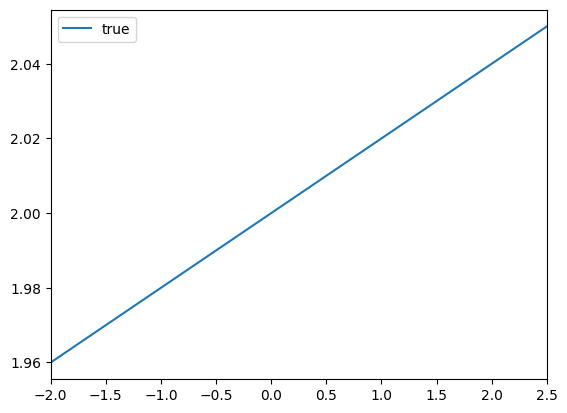

In [1]:
import numpy as np
import matplotlib.pyplot as plt


f = lambda x: 0.02 * x + 2
x = np.linspace(-2, 2.5, 10)

plt.plot(x, f(x), label='true')
plt.xlim([-2, 2.5])
plt.legend();

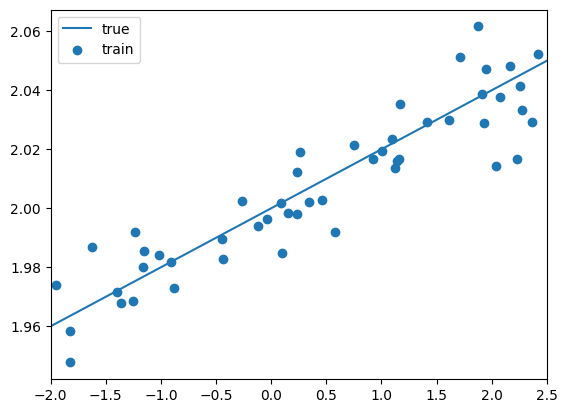

In [2]:
n = 50
np.random.seed(9)
x_train = np.random.uniform(-2, 2.5, n)
y_train = f(x_train) + 0.01 * np.random.randn(n)

plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.xlim([-2, 2.5])
plt.legend();


Создадим сеть, она очень простая, состоит из одного слоя и одного нейрона.

<img src='https://drive.google.com/uc?id=1Qx71h2FmXS6uKHmhcIKtp49G5nqMncWK'>

In [3]:
weight_1 = 0.5
weight_0 = -9

In [4]:
pred = weight_0 + weight_1 * x_train

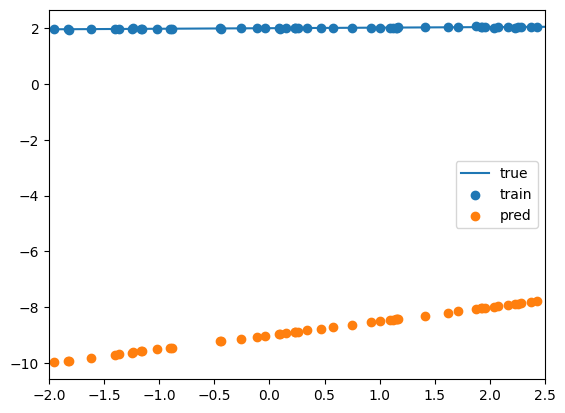

In [5]:
plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, pred, label='pred')
plt.xlim([-2, 2.5])
plt.legend();

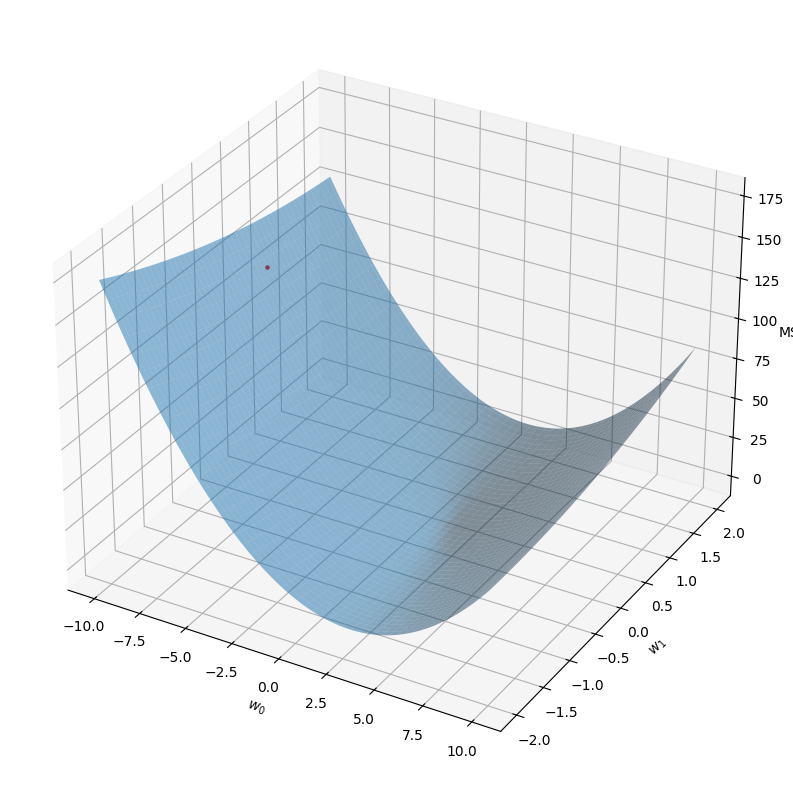

In [6]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.show()

### Градиентный спуск

<img src='https://preview.redd.it/9euoe42zwj641.jpg?auto=webp&s=7a36933db5ce25bb9e1b14714519b4785203b620'>
<details>
  <summary>Оригинал </summary>
https://preview.redd.it/9euoe42zwj641.jpg?auto=webp&s=7a36933db5ce25bb9e1b14714519b4785203b620

</details>




$MSE = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-\text{y_pred}_i})^2 = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-(w_1\cdot X_i + w_0)})^2 = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-w_1\cdot X_i - w_0})^2$


gr_mserror - is the gradient of the MSE function. Let's describe it separately for the shear coefficient and the slope coefficient:

Shift:
$\frac{∂ MSE}{∂ w_0} = \frac{1 \cdot 2}{n}\sum({y_i -\text{y_pred}_i})\cdot -1$

slope:
$\frac{∂ MSE}{∂ w_1} = \frac{1 \cdot 2}{n}\sum({y_i -\text{y_pred}_i})\cdot -X$

In [7]:
#
def gr_mserror(X, w0, w1, y):
    y_pred = w1 * X + w0
    return np.array([2/len(X)*np.sum((y - y_pred)) * (-1),
                     2/len(X)*np.sum((y - y_pred) * (-X))])

#### Gradient Descent Algorithm


1. initialization of the starting point
2. Cycle through k = 1,2,3,....:

- $ w_{k} = w_{k-1} - \eta\nabla f(X, w_{k-1}) $

- If $|||w_{k} - w_{k-1}||| < \epsilon$, then terminate.

In [8]:
k = 50
lr = 0.1


weights_0, weights_1 = [weight_0], [weight_1]

for i in range(k):
    grad = gr_mserror(x_train, weights_0[-1], weights_1[-1], y_train)

    new_w_0 = weights_0[-1] - lr * grad[0]
    new_w_1 = weights_1[-1] - lr * grad[1]

    weights_0.append(new_w_0)
    weights_1.append(new_w_1)

gd_weights_0 = weights_0.copy()
gd_weights_0

[-9,
 np.float64(-6.842853811984711),
 np.float64(-5.186920226846526),
 np.float64(-3.8877066397526194),
 np.float64(-2.8508643243530614),
 np.float64(-2.012715297174011),
 np.float64(-1.328761412918464),
 np.float64(-0.766827622695394),
 np.float64(-0.30290869717815705),
 np.float64(0.08139613206088747),
 np.float64(0.40050698988967376),
 np.float64(0.665921670949684),
 np.float64(0.886928461920637),
 np.float64(1.0711032273217804),
 np.float64(1.2246681255927316),
 np.float64(1.3527587706353987),
 np.float64(1.4596287175893683),
 np.float64(1.5488095233060373),
 np.float64(1.623238254057834),
 np.float64(1.6853604209274766),
 np.float64(1.7372138964686845),
 np.float64(1.7804978123746948),
 np.float64(1.8166294117663468),
 np.float64(1.8467911287091736),
 np.float64(1.8719696717090422),
 np.float64(1.8929885252819012),
 np.float64(1.9105350103958343),
 np.float64(1.9251828333402627),
 np.float64(1.9374108859364745),
 np.float64(1.947618926463698),
 np.float64(1.9561406623943012),
 np

In [9]:
gd_weights_1 = weights_1.copy()
gd_weights_1

[0.5,
 np.float64(1.2870006637040499),
 np.float64(1.57495910519973),
 np.float64(1.6034755558648477),
 np.float64(1.5056389389965201),
 np.float64(1.3541259204955622),
 np.float64(1.187545573790087),
 np.float64(1.0254626826614335),
 np.float64(0.87693797615654),
 np.float64(0.7453603096206045),
 np.float64(0.6311616808414937),
 np.float64(0.5333265158331935),
 np.float64(0.45021688585665304),
 np.float64(0.3800118053900685),
 np.float64(0.320930659647655),
 np.float64(0.2713374501640942),
 np.float64(0.22978058441164156),
 np.float64(0.19499897335235877),
 np.float64(0.16591155188852186),
 np.float64(0.1415995913816614),
 np.float64(0.12128680183446901),
 np.float64(0.10431977451102366),
 np.float64(0.09014996359634575),
 np.float64(0.07831767309576142),
 np.float64(0.0684381313477716),
 np.float64(0.060189545766273805),
 np.float64(0.05330294703423182),
 np.float64(0.04755360542275573),
 np.float64(0.042753804474406014),
 np.float64(0.03874677362739681),
 np.float64(0.03540160314706

In [10]:
pred = weights_0[-1] + weights_1[-1] * x_train

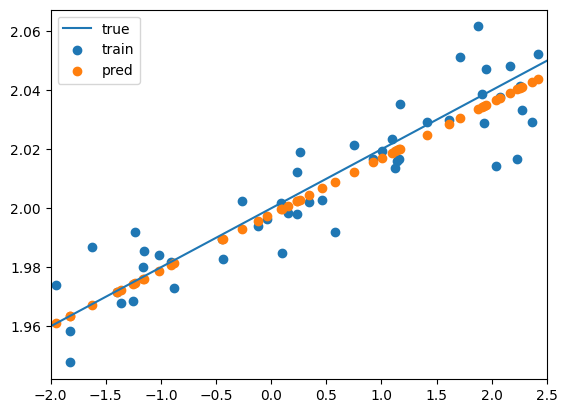

In [11]:
plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, pred, label='pred')
plt.xlim([-2, 2.5])
plt.legend();

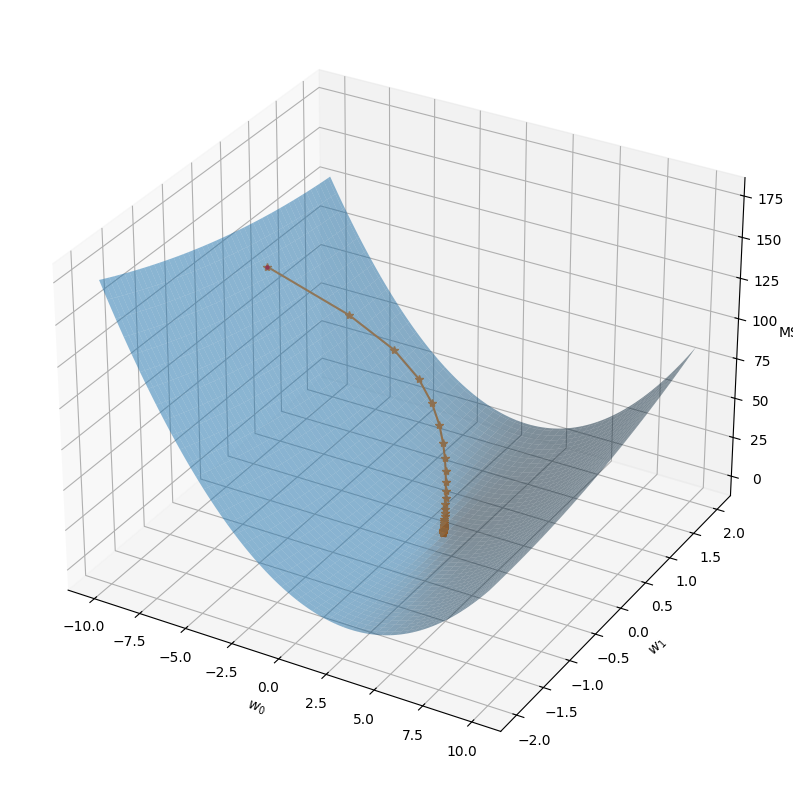

In [12]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

mses = []
for i in range(len(gd_weights_0)):
    mses.append(mse(gd_weights_0[i], gd_weights_1[i]))
ax.plot(gd_weights_0, gd_weights_1, mses, marker='*')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.show()

[link text](https://)### Stochastic Gradient Descent


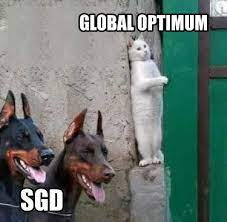

#### Stochastic Gradient Descent Algorithm


1. initialization of the starting point
2. Cycle through k = 1,2,3,....:
- We choose a random $x_i$ from X
- $ w_{k} = w_{k-1} - \eta\nabla f(x_i, w_{k-1}) $

- If $|||w_{k} - w_{k-1}||| < \epsilon$, then terminate.

In [13]:
k = 50
lr = 0.1


weights_0, weights_1 = [weight_0], [weight_1]

for i in range(k):
    idx = np.random.choice(len(x_train))
    grad = gr_mserror(x_train[[idx]], weights_0[-1], weights_1[-1], y_train[[idx]])

    new_w_0 = weights_0[-1] - lr * grad[0]
    new_w_1 = weights_1[-1] - lr * grad[1]

    weights_0.append(new_w_0)
    weights_1.append(new_w_1)

sgd_weights_0 = weights_0.copy()
sgd_weights_0

[-9,
 np.float64(-6.815416410593148),
 np.float64(-4.980536379756948),
 np.float64(-3.5866032980529265),
 np.float64(-3.002447160986093),
 np.float64(-1.747323831322639),
 np.float64(-0.16336222495578712),
 np.float64(0.49069109347250706),
 np.float64(0.8130549934190352),
 np.float64(0.9633131257256021),
 np.float64(1.418790076701028),
 np.float64(1.6210752876881278),
 np.float64(1.768515873589087),
 np.float64(1.788742795866886),
 np.float64(1.7815400363102492),
 np.float64(1.8272051585625677),
 np.float64(1.8449508043395622),
 np.float64(1.8203504360142844),
 np.float64(1.8723796944485807),
 np.float64(1.8946447741692718),
 np.float64(1.9257743212086396),
 np.float64(1.9312552234392577),
 np.float64(1.945102728671552),
 np.float64(1.9503836360570612),
 np.float64(1.951627881458415),
 np.float64(1.9610808761710554),
 np.float64(1.9616511522898903),
 np.float64(1.9671228475706528),
 np.float64(1.96975907699054),
 np.float64(1.9641764633380803),
 np.float64(1.9807404648249591),
 np.floa

In [14]:
sgd_weights_1 = weights_1.copy()
sgd_weights_1

[0.5,
 np.float64(0.8296166588109013),
 np.float64(0.012625096031446792),
 np.float64(-1.9357687326131874),
 np.float64(-2.730513224536114),
 np.float64(-2.14654196318567),
 np.float64(0.9109851350634179),
 np.float64(0.09374130118848345),
 np.float64(-0.3568483587296363),
 np.float64(-0.5319084602957519),
 np.float64(0.4951138935566394),
 np.float64(0.31184764712013824),
 np.float64(0.12761968543038102),
 np.float64(0.15079939978824208),
 np.float64(0.1367286945792585),
 np.float64(0.13139897259434485),
 np.float64(0.14164564865111734),
 np.float64(0.0861760400815592),
 np.float64(0.02555870692228425),
 np.float64(0.0757626404791526),
 np.float64(0.047559910228460914),
 np.float64(0.05642159170956125),
 np.float64(0.05480540523216671),
 np.float64(0.060962316305468486),
 np.float64(0.06168076745247203),
 np.float64(0.061302643801931775),
 np.float64(0.061967518054513594),
 np.float64(0.06279310418691059),
 np.float64(0.06370229015685304),
 np.float64(0.057421994666994707),
 np.float64

In [15]:
pred = weights_0[-1] + weights_1[-1] * x_train

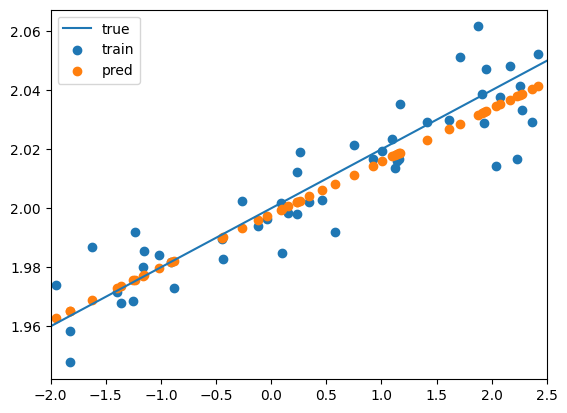

In [16]:
plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, pred, label='pred')
plt.xlim([-2, 2.5])
plt.legend();

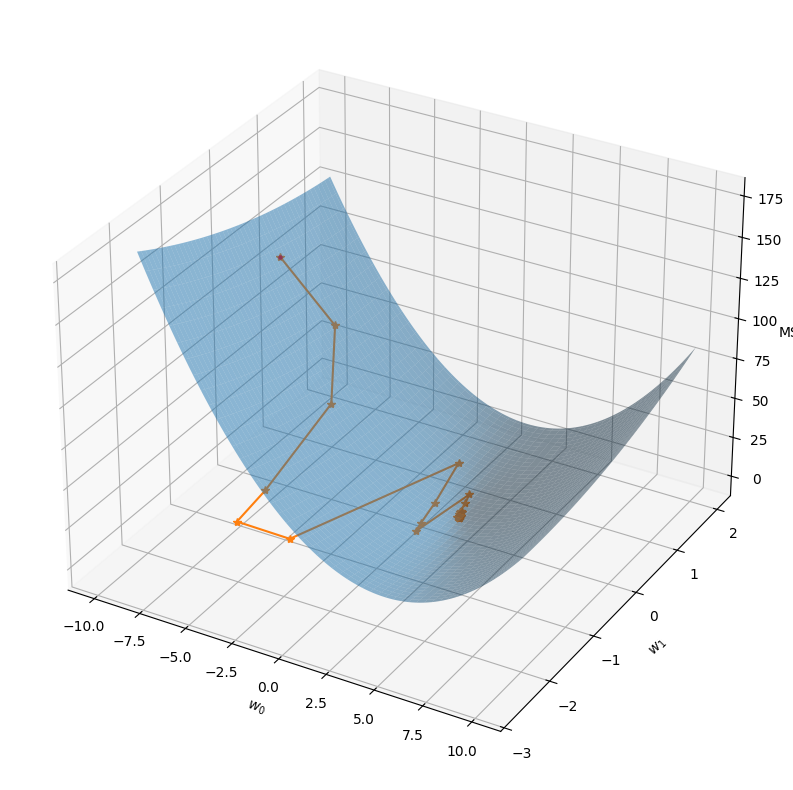

In [17]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

mses = []
for i in range(len(sgd_weights_0)):
    mses.append(mse(sgd_weights_0[i], sgd_weights_1[i]))
ax.plot(sgd_weights_0, sgd_weights_1, mses, marker='*')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.show()

### Mini-Batch Stochastic Gradient Descent

---



#### Algorithm of mini-batch stochastic gradient descent


1. initialization of the starting point
2. Cycle through k = 1,2,3,....:
- We choose random $x_i$ from X
- $ w_{k} = w_{k-1} - \eta\nabla f(x_i, w_{k-1}) $

- If $|||w_{k} - w_{k-1}||| < \epsilon$, then terminate.

In [18]:
k = 50
lr = 0.1
amount = 10

weights_0, weights_1 = [weight_0], [weight_1]

for i in range(k):
    idx = np.random.choice(len(x_train), size=amount, replace=False)
    grad = gr_mserror(x_train[idx], weights_0[-1], weights_1[-1], y_train[idx])

    new_w_0 = weights_0[-1] - lr * grad[0]
    new_w_1 = weights_1[-1] - lr * grad[1]

    weights_0.append(new_w_0)
    weights_1.append(new_w_1)

mb_sgd_weights_0 = weights_0.copy()
mb_sgd_weights_0

[-9,
 np.float64(-6.8631444974880935),
 np.float64(-5.243532234948031),
 np.float64(-3.964728683106543),
 np.float64(-2.761860290490796),
 np.float64(-1.9602405553175857),
 np.float64(-1.2614713382579539),
 np.float64(-0.7051494542787037),
 np.float64(-0.19130826145581192),
 np.float64(0.19735493655901348),
 np.float64(0.4540554872330744),
 np.float64(0.6954939923074622),
 np.float64(0.8835714149963764),
 np.float64(1.0821488249225226),
 np.float64(1.2715886813242168),
 np.float64(1.4094460803378102),
 np.float64(1.5009043928667811),
 np.float64(1.5824925765190607),
 np.float64(1.6626290845385507),
 np.float64(1.70463655505107),
 np.float64(1.7593113901446469),
 np.float64(1.8011504276870667),
 np.float64(1.8351090976818951),
 np.float64(1.8661914272992615),
 np.float64(1.8827243218591394),
 np.float64(1.8994988561775148),
 np.float64(1.9206850461982232),
 np.float64(1.9361346260244483),
 np.float64(1.9475967012787039),
 np.float64(1.9540227080228576),
 np.float64(1.9618861035243298),


In [19]:
mb_sgd_weights_1 = weights_1.copy()
mb_sgd_weights_1

[0.5,
 np.float64(1.7246898086829847),
 np.float64(1.8056945571548562),
 np.float64(1.4759660011336715),
 np.float64(0.886515113634535),
 np.float64(1.2686793523927706),
 np.float64(1.0185716918578627),
 np.float64(0.8483567745159718),
 np.float64(0.6578165049752246),
 np.float64(0.6745992441640802),
 np.float64(0.6728158989669826),
 np.float64(0.5862939750549395),
 np.float64(0.4646264444928448),
 np.float64(0.36896555329415204),
 np.float64(0.23081973094765385),
 np.float64(0.1740570282212759),
 np.float64(0.2191683792369032),
 np.float64(0.17587710234306747),
 np.float64(0.13478559202490523),
 np.float64(0.14882521450432554),
 np.float64(0.10185951769524165),
 np.float64(0.09260767126628092),
 np.float64(0.08344085064567047),
 np.float64(0.0684160306793663),
 np.float64(0.0732082025007851),
 np.float64(0.06179484804089026),
 np.float64(0.044584214228515745),
 np.float64(0.03506409078807804),
 np.float64(0.030187867876028424),
 np.float64(0.03786077062733323),
 np.float64(0.033328915

In [20]:
pred = weights_0[-1] + weights_1[-1] * x_train

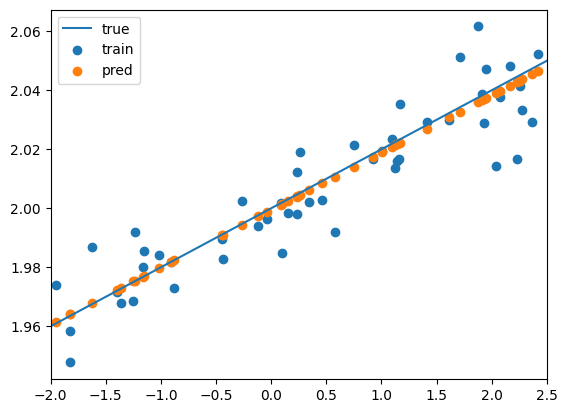

In [21]:
plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, pred, label='pred')
plt.xlim([-2, 2.5])
plt.legend();

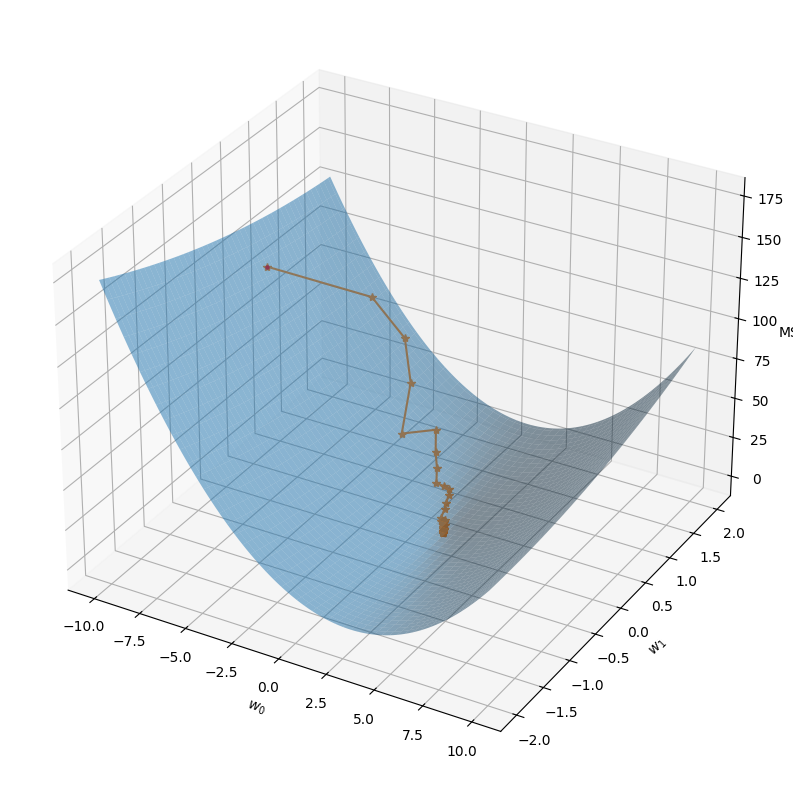

In [22]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

mses = []
for i in range(len(mb_sgd_weights_0)):
    mses.append(mse(mb_sgd_weights_0[i], mb_sgd_weights_1[i]))
ax.plot(mb_sgd_weights_0, mb_sgd_weights_1, mses, marker='*')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.show()

<img src='https://ml-explained.com/_ipx/sizes_xs:320px%20md:768px%20lg:1024px,w_1536,f_png/articles/gradient-descent-explained/variations_comparison.png'>

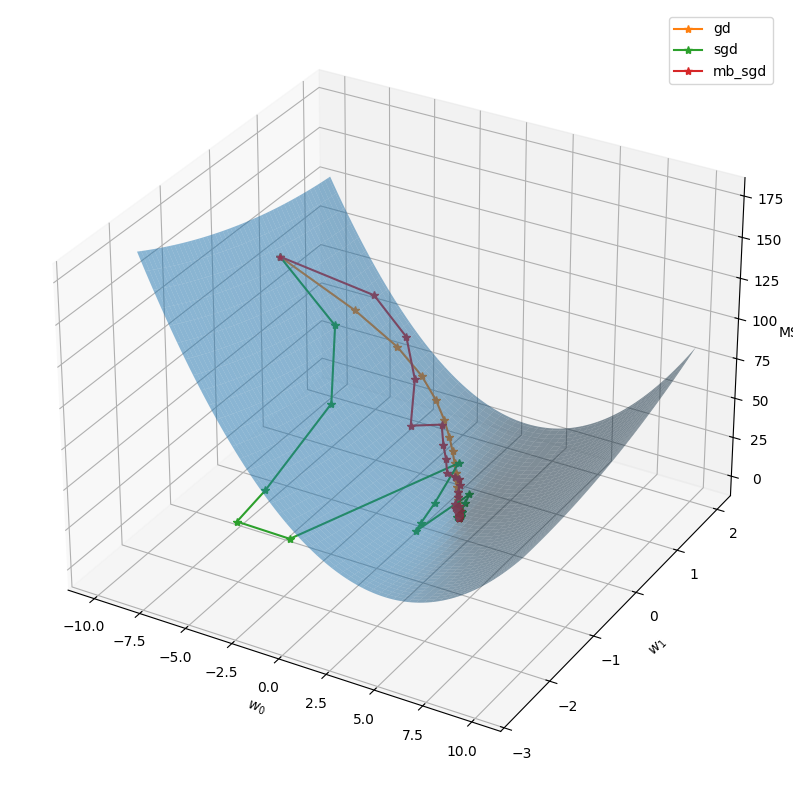

In [23]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

mses = []
for i in range(len(gd_weights_0)):
    mses.append(mse(gd_weights_0[i], gd_weights_1[i]))
ax.plot(gd_weights_0, gd_weights_1, mses, marker='*', label='gd')

mses = []
for i in range(len(sgd_weights_0)):
    mses.append(mse(sgd_weights_0[i], sgd_weights_1[i]))
ax.plot(sgd_weights_0, sgd_weights_1, mses, marker='*', label='sgd')

mses = []
for i in range(len(mb_sgd_weights_0)):
    mses.append(mse(mb_sgd_weights_0[i], mb_sgd_weights_1[i]))
ax.plot(mb_sgd_weights_0, mb_sgd_weights_1, mses, marker='*', label='mb_sgd')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.legend()
plt.show()

### Stochastic gradient descent + Momentum



<img src='https://drive.google.com/uc?export=view&id=1JMoY1y1oZUtiicvCuhxhliiLBLoNl7bA'>

Rule for updating weights w with gradient g when momentum == 0:

$w^{k} = w^{k-1} - \eta * {\nabla Q(w^{k-1}, X)}$$

Rule for updating weights w with gradient g when momentum > 0:

$velocity = momentum * velocity - \eta * {\nabla Q(w^{k-1}, X)}$<br>
$w^{k} = w^{k-1} + velocity$

<img src='https://drive.google.com/uc?export=view&id=1h0u3hNo2cjDRoq0FVdXIScgRo6Iq687y'>

By adding a pulse, the optimization is smoothed.

|$t_1$|$t_2$|..|$t_n$|
|--|--|--|--|
|$g_1$|$g_2$|..|$g_n$|

$\gamma = 0.5$

$v_1 = g_1$<br>
$v_2 = \gamma * v_1 + g_2 = 0.5 * g_1 + g_2$<br>
$v_3 = \gamma * v_2 + g_3 = \gamma (\gamma * v_1 + g_2) + g_3 = \gamma^2 * g_1 + \gamma * g_2 + g_3 = 0.25 * g_1 + 0.5 * g_2 + g_3$<br>


#### Algorithm

1. initialization of the starting point
2. Cycle through k = 1,2,3,....:

- Choose random $x_i$ from X
- $velocity = momentum * velocity - \eta\nabla f(x_i, w_{k-1}) $

- $ w_{k} = w_{k-1} + velocity $

- If $|||w_{k} - w_{k-1}||| < \epsilon$, then terminate.

In [24]:
k = 50
lr = 0.1


weights_0, weights_1 = [weight_0], [weight_1]

velocity = [0, 0]
momentum = 0.5
for i in range(k):
    idx = np.random.choice(len(x_train), size=amount, replace=False)
    grad = gr_mserror(x_train[idx], weights_0[-1], weights_1[-1], y_train[idx])

    velocity[0] = momentum * velocity[0] - lr * grad[0]
    velocity[1] = momentum * velocity[1] - lr * grad[1]

    new_w_0 = weights_0[-1] + velocity[0]
    new_w_1 = weights_1[-1] + velocity[1]

    weights_0.append(new_w_0)
    weights_1.append(new_w_1)

momentum_sgd_weights_0 = weights_0.copy()
momentum_sgd_weights_0

[-9,
 np.float64(-6.80285136109089),
 np.float64(-3.9715915774580517),
 np.float64(-1.417504885563678),
 np.float64(0.3465286892411563),
 np.float64(1.4512964697568411),
 np.float64(2.125852394758322),
 np.float64(2.3937708226452443),
 np.float64(2.45038378575563),
 np.float64(2.4002146678710354),
 np.float64(2.327413294780666),
 np.float64(2.241675262348407),
 np.float64(2.160083930519824),
 np.float64(2.083319928150862),
 np.float64(2.0258768999052634),
 np.float64(1.9905053836829067),
 np.float64(1.9667361981046803),
 np.float64(1.9598221093015065),
 np.float64(1.9635721447012142),
 np.float64(1.974223700360884),
 np.float64(1.985603309484002),
 np.float64(1.9940891057665764),
 np.float64(1.9993422120413833),
 np.float64(2.0014724400912556),
 np.float64(2.001862689754177),
 np.float64(2.001845318247777),
 np.float64(2.001608318552937),
 np.float64(2.000392954356415),
 np.float64(1.9992092827544294),
 np.float64(1.99855265837311),
 np.float64(1.9983659689574171),
 np.float64(1.999002

In [25]:
momentum_sgd_weights_1 = weights_1.copy()
momentum_sgd_weights_1

[0.5,
 np.float64(0.4672498718037054),
 np.float64(0.9018523191177299),
 np.float64(1.264985861582988),
 np.float64(1.2688048210174367),
 np.float64(1.0366098412983347),
 np.float64(0.4635191888457091),
 np.float64(-0.006671446130697367),
 np.float64(-0.2522792197845646),
 np.float64(-0.33454142798701053),
 np.float64(-0.2728555896999175),
 np.float64(-0.15280727161966903),
 np.float64(-0.04515048032694498),
 np.float64(0.0428326883778332),
 np.float64(0.07229927302111),
 np.float64(0.06701849638696215),
 np.float64(0.04365330846446977),
 np.float64(0.020763894150583787),
 np.float64(0.008860329849622942),
 np.float64(0.011017307708050407),
 np.float64(0.018708565580399295),
 np.float64(0.022096916464598732),
 np.float64(0.02216320739709747),
 np.float64(0.021170060897334444),
 np.float64(0.01809667157632993),
 np.float64(0.01665491004942651),
 np.float64(0.017401189146869448),
 np.float64(0.0179324730970616),
 np.float64(0.017919534915551982),
 np.float64(0.017842850187316205),
 np.fl

In [26]:
pred = weights_0[-1] + weights_1[-1] * x_train

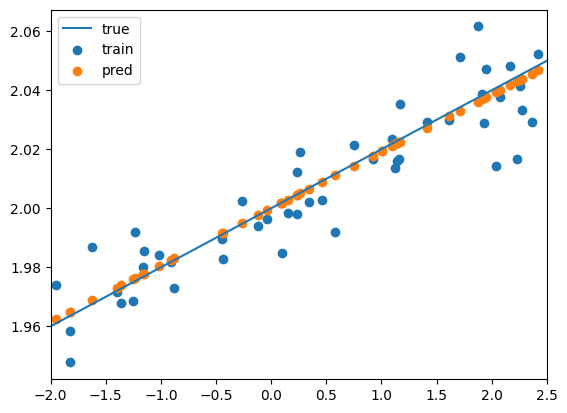

In [27]:
plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, pred, label='pred')
plt.xlim([-2, 2.5])
plt.legend();

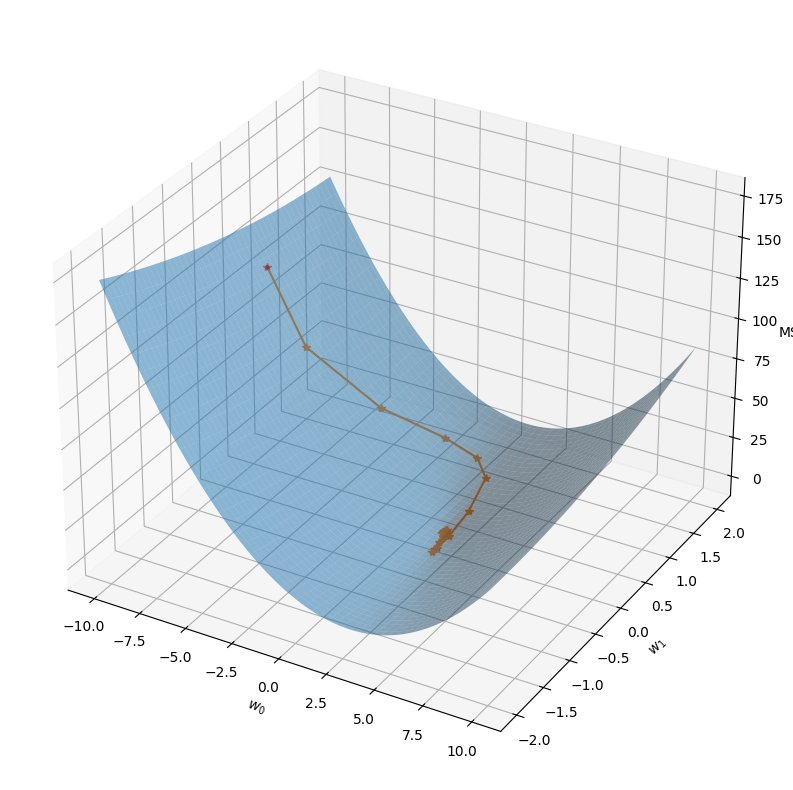

In [28]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

mses = []
for i in range(len(momentum_sgd_weights_0)):
    mses.append(mse(momentum_sgd_weights_0[i], momentum_sgd_weights_1[i]))
ax.plot(momentum_sgd_weights_0, momentum_sgd_weights_1, mses, marker='*')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.show()

Experiments with momentum

In [29]:
k = 50
lr = 0.1


momentum_sgd_weights_0_exp = []
momentum_sgd_weights_1_exp = []
momentums = np.linspace(0, 0.8, 5)

for momentum in momentums:
    weights_0, weights_1 = [weight_0], [weight_1]
    velocity = [0, 0]

    for i in range(k):
        idx = np.random.choice(len(x_train), size=amount, replace=False)
        grad = gr_mserror(x_train[idx], weights_0[-1], weights_1[-1], y_train[idx])

        velocity[0] = momentum * velocity[0] - lr * grad[0]
        velocity[1] = momentum * velocity[1] - lr * grad[1]

        new_w_0 = weights_0[-1] + velocity[0]
        new_w_1 = weights_1[-1] + velocity[1]

        weights_0.append(new_w_0)
        weights_1.append(new_w_1)

    momentum_sgd_weights_0_exp.append(weights_0)
    momentum_sgd_weights_1_exp.append(weights_1)

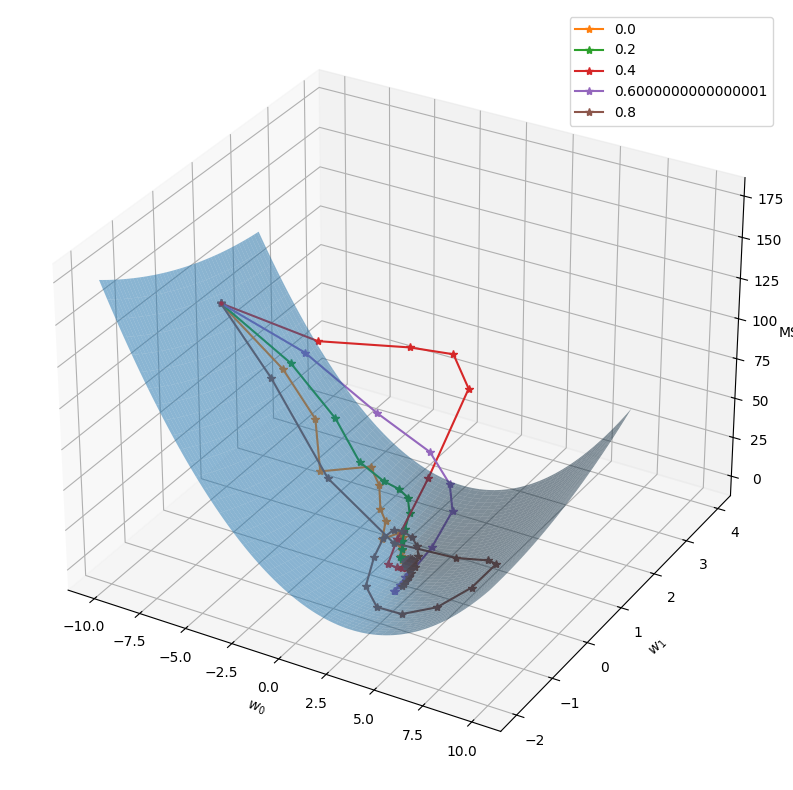

In [30]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

for j, (weights_0, weights_1) in enumerate(zip(momentum_sgd_weights_0_exp, momentum_sgd_weights_1_exp)):
    mses = []
    for i in range(len(weights_0)):
        mses.append(mse(weights_0[i], weights_1[i]))
    ax.plot(weights_0, weights_1, mses, marker='*', label=momentums[j])

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')
plt.legend()
plt.show()

In [31]:
from keras.optimizers import SGD
SGD(momentum=0.5)

### RMS-Prop (Root Mean Square Propagation)

This optimizer fixes the problem with unchanging weights in Adagrad by introducing a restriction on weight gradients.

> Add blockquote



<h2>$\eta_{k} = \frac{\eta}{\sqrt{W_{avg_k} + \epsilon}}$$</h2>
where $\epsilon$ is a small number to avoid division by zero.

$W_{avg_{0}} = 0$

<h4>$W_{avg_k} = \rho * W_{avg_{k-1}}+(1-\rho){\nabla Q(w^{k-1}, X)}^2$</h4>$</h4>

Update weights:

<h4>$ w^{k} = w^{k-1} - \eta_k\nabla Q(w^{k-1}, X)$</h4>

#### Algorithm

1. initialization of the starting point
2. Cycle through k = 1,2,3,....:

- We choose random $x_i$ from X
- $\alpha_{avg_k} = ρ ⋅ \alpha_{avg_{k-1}} + (1 - \rho) \nabla f(x_i, w_{k-1})^2$
- $\eta_k = \frac{\eta}{\sqrt{\alpha_{avg_k} + ϵ}} $
- $ w_{k} = w_{k-1} - \eta_k\nabla f(x_i, w_{k-1}) $

- If $|||w_{k} - w_{k-1}||| < \epsilon$, then terminate.

In [38]:
k = 50
lr = 0.1


weights_0, weights_1 = [weight_0], [weight_1]

alphas = [0, 0]
eps = 10e-7
rho = 0.9
for i in range(k):
    idx = np.random.choice(len(x_train), size=amount, replace=False)
    grad = gr_mserror(x_train[idx], weights_0[-1], weights_1[-1], y_train[idx])

    alphas[0] = rho * alphas[0] + (1 - rho) * grad[0] ** 2
    alphas[1] = rho * alphas[1] + (1 - rho) * grad[1] ** 2

    lr_k_0 = lr / np.sqrt(alphas[0] + eps)
    lr_k_1 = lr / np.sqrt(alphas[1] + eps)

    new_w_0 = weights_0[-1] - lr_k_0 * grad[0]
    new_w_1 = weights_1[-1] - lr_k_1 * grad[1]

    weights_0.append(new_w_0)
    weights_1.append(new_w_1)

rmsprop_sgd_weights_0 = weights_0.copy()
rmsprop_sgd_weights_0

[-9,
 np.float64(-8.683772237388066),
 np.float64(-8.460646721673141),
 np.float64(-8.272802871111313),
 np.float64(-8.113505217057588),
 np.float64(-7.9643281201833815),
 np.float64(-7.820845027292763),
 np.float64(-7.69043816451011),
 np.float64(-7.573133501361961),
 np.float64(-7.44858892709658),
 np.float64(-7.32092823864745),
 np.float64(-7.213574221153117),
 np.float64(-7.104420270505712),
 np.float64(-7.003162472930249),
 np.float64(-6.895085917451976),
 np.float64(-6.788407967647309),
 np.float64(-6.675014389785166),
 np.float64(-6.575564920847412),
 np.float64(-6.4652692460560015),
 np.float64(-6.3601262715436455),
 np.float64(-6.263040676473646),
 np.float64(-6.174841766282016),
 np.float64(-6.079061425857871),
 np.float64(-5.987643484085229),
 np.float64(-5.89978221100363),
 np.float64(-5.806316476267941),
 np.float64(-5.719357055659176),
 np.float64(-5.624384180699591),
 np.float64(-5.550164788879926),
 np.float64(-5.459051206987965),
 np.float64(-5.376756081366612),
 np.fl

In [39]:
rmsprop_sgd_weights_1 = weights_1.copy()
rmsprop_sgd_weights_1

[0.5,
 np.float64(0.8162277447673025),
 np.float64(1.0719439257717043),
 np.float64(1.1205652610892323),
 np.float64(1.3518954585751395),
 np.float64(1.4371019724243128),
 np.float64(1.4406774781947702),
 np.float64(1.4841900903948309),
 np.float64(1.6652753601498975),
 np.float64(1.635324408054),
 np.float64(1.487415605039805),
 np.float64(1.5860197390031312),
 np.float64(1.572890317690054),
 np.float64(1.6897678844809345),
 np.float64(1.6850334952869501),
 np.float64(1.639596728517139),
 np.float64(1.4438599783621202),
 np.float64(1.4257253205310063),
 np.float64(1.2643737399541404),
 np.float64(1.167223954037287),
 np.float64(1.2077765016294373),
 np.float64(1.326543943148161),
 np.float64(1.332629326825245),
 np.float64(1.3932458463958826),
 np.float64(1.4870615894586807),
 np.float64(1.4914921198519917),
 np.float64(1.5883241341706833),
 np.float64(1.5221396977430792),
 np.float64(1.6965748866571682),
 np.float64(1.6737806081445055),
 np.float64(1.7653088789865397),
 np.float64(1.

In [40]:
pred = weights_0[-1] + weights_1[-1] * x_train

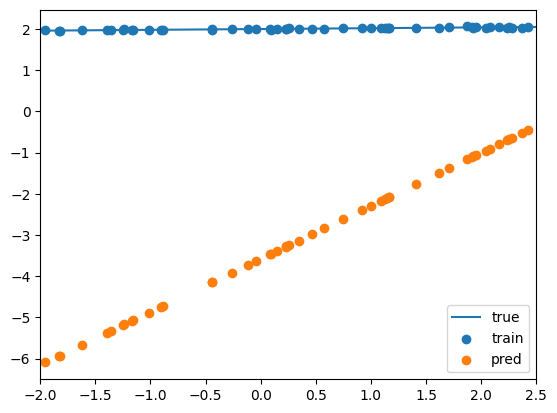

In [41]:
plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, pred, label='pred')
plt.xlim([-2, 2.5])
plt.legend();

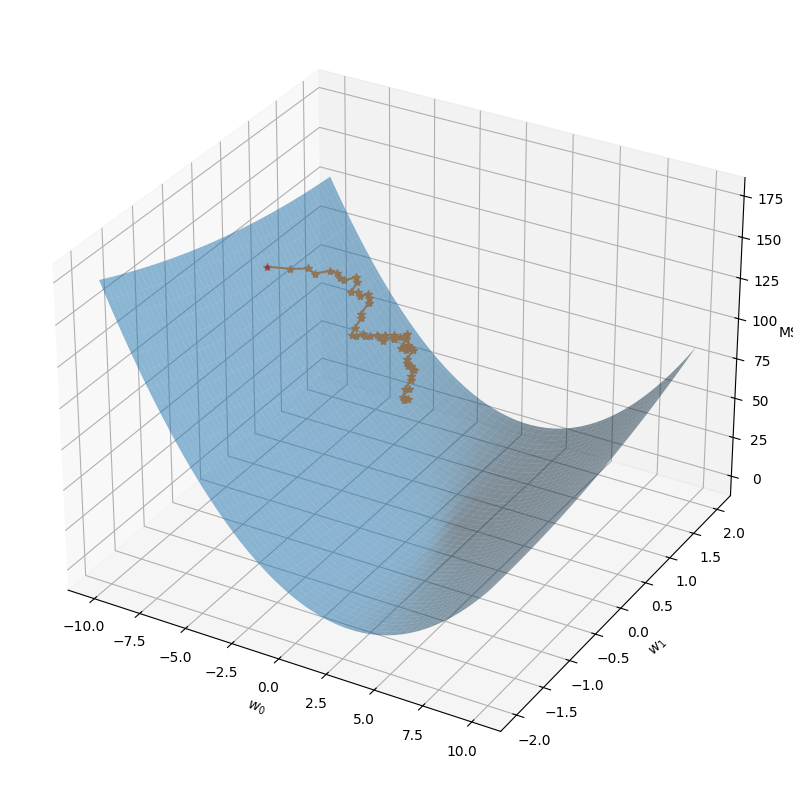

In [42]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

mses = []
for i in range(len(rmsprop_sgd_weights_0)):
    mses.append(mse(rmsprop_sgd_weights_0[i], rmsprop_sgd_weights_1[i]))
ax.plot(rmsprop_sgd_weights_0, rmsprop_sgd_weights_1, mses, marker='*')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.show()

In [43]:
k = 50
lr = 1


rmsprop_sgd_weights_0_exp = []
rmsprop_sgd_weights_1_exp = []
rhos = np.linspace(0.1, 0.9, 5)

for rho in rhos:
    weights_0, weights_1 = [weight_0], [weight_1]
    alphas = [0, 0]
    eps = 10e-7

    for i in range(k):
        idx = np.random.choice(len(x_train), size=amount, replace=False)
        grad = gr_mserror(x_train[idx], weights_0[-1], weights_1[-1], y_train[idx])

        alphas[0] = rho * alphas[0] + (1 - rho) * grad[0] ** 2
        alphas[1] = rho * alphas[1] + (1 - rho) * grad[1] ** 2

        lr_k_0 = lr / np.sqrt(alphas[0] + eps)
        lr_k_1 = lr / np.sqrt(alphas[1] + eps)

        new_w_0 = weights_0[-1] - lr_k_0 * grad[0]
        new_w_1 = weights_1[-1] - lr_k_1 * grad[1]

        weights_0.append(new_w_0)
        weights_1.append(new_w_1)

    rmsprop_sgd_weights_0_exp.append(weights_0)
    rmsprop_sgd_weights_1_exp.append(weights_1)

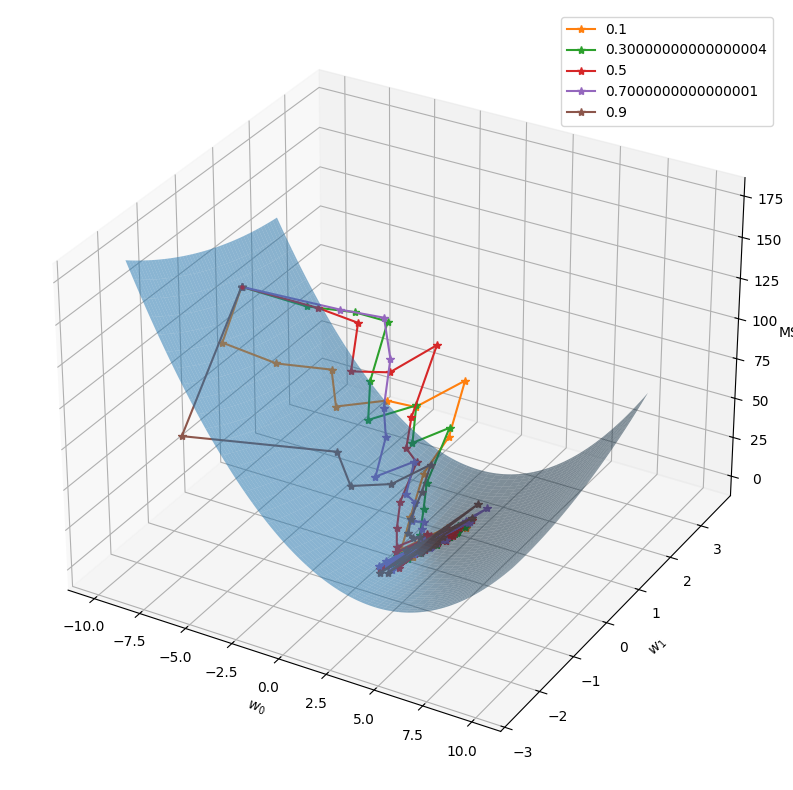

In [44]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

for j, (weights_0, weights_1) in enumerate(zip(rmsprop_sgd_weights_0_exp, rmsprop_sgd_weights_1_exp)):
    mses = []
    for i in range(len(weights_0)):
        mses.append(mse(weights_0[i], weights_1[i]))
    ax.plot(weights_0, weights_1, mses, marker='*', label=rhos[j])

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')
plt.legend()
plt.show()

In [45]:
from keras.optimizers import RMSprop
RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07)

### Adam (Adaptive Moment Estimation)

<img src='https://i.pinimg.com/736x/7b/58/bb/7b58bb3b853ff61ed8873aeb711cb3b6.jpg'>
Оригинал https://i.pinimg.com/736x/7b/58/bb/7b58bb3b853ff61ed8873aeb711cb3b6.jpg

Two pluses of the previous optimizers are combined here:
1. impulse (gives smoothing of optimization)
2. Gradual decrease of the learning rate

<h4>$V_{k} = \beta_1 * V_{k-1} + g_k$</h4>

<h4>$W_{avg_k} = \beta_2 * W_{avg_{k-1}}+(1-\beta_2){\nabla Q(w^{k-1}, X)}^2$</h4>$</h4>

Update weights:
<h4>$ w^{k} = w^{k-1} - \frac{\eta * V_k}{\sqrt{W_{avg_k} + \epsilon}}$$</h4>

#### Algorithm

1. initialization of the starting point
2. Cycle through k = 1,2,3,....:

- Choose random $x_i$ from X
- $velocity = β_1 * velocity + \nabla f(x_i, w_{k-1}) $

- $\alpha_{avg_k} = β_2 ⋅ \alpha_{avg_{k-1}} + (1 - β_2) \nabla f(x_i, w_{k-1})^2$
- $ w_{k} = w_{k-1} - \frac{\eta ⋅ velocity}{\sqrt{\alpha_{avg_k} + ϵ}} $

- If $|||w_{k} - w_{k-1}||| < \epsilon$, then terminate.

In [46]:
k = 50
lr = 0.1


weights_0, weights_1 = [weight_0], [weight_1]

alphas = [0, 0]
velocity = [0, 0]

eps = 10e-7

b1 = 0.6
b2 = 0.9
for i in range(k):
    idx = np.random.choice(len(x_train), size=amount, replace=False)
    grad = gr_mserror(x_train[idx], weights_0[-1], weights_1[-1], y_train[idx])

    velocity[0] = b1 * velocity[0] + grad[0]
    velocity[1] = b1 * velocity[1] + grad[1]

    alphas[0] = b2 * alphas[0] + (1 - b2) * grad[0] ** 2
    alphas[1] = b2 * alphas[1] + (1 - b2) * grad[1] ** 2

    new_w_0 = weights_0[-1] - (lr * velocity[0]) / np.sqrt(alphas[0] + eps)
    new_w_1 = weights_1[-1] - (lr * velocity[1]) / np.sqrt(alphas[1] + eps)

    weights_0.append(new_w_0)
    weights_1.append(new_w_1)

adam_sgd_weights_0 = weights_0.copy()
adam_sgd_weights_0

[-9,
 np.float64(-8.683772237271825),
 np.float64(-8.317769413790431),
 np.float64(-7.945746152679793),
 np.float64(-7.58223793256111),
 np.float64(-7.232299082460965),
 np.float64(-6.909265010756961),
 np.float64(-6.604153135754642),
 np.float64(-6.319064954074457),
 np.float64(-6.040508556091247),
 np.float64(-5.772494720340243),
 np.float64(-5.521421522228636),
 np.float64(-5.262207170485517),
 np.float64(-5.006187204652823),
 np.float64(-4.766822674044003),
 np.float64(-4.5520648298664),
 np.float64(-4.346792297486972),
 np.float64(-4.145042379116957),
 np.float64(-3.9690910853469292),
 np.float64(-3.759072464565765),
 np.float64(-3.558160690265171),
 np.float64(-3.335961784826991),
 np.float64(-3.116176908460312),
 np.float64(-2.8940961460531227),
 np.float64(-2.6840595476957176),
 np.float64(-2.4930674200824026),
 np.float64(-2.304273374686693),
 np.float64(-2.113188063632582),
 np.float64(-1.9147184765701),
 np.float64(-1.7158015141420722),
 np.float64(-1.5337278832929524),
 np.

In [47]:
adam_sgd_weights_1 = weights_1.copy()
adam_sgd_weights_1

[0.5,
 np.float64(0.1837753922557363),
 np.float64(0.4256308020125479),
 np.float64(0.7644438527582124),
 np.float64(1.0493298003433291),
 np.float64(1.1552059265113053),
 np.float64(1.4583760152928735),
 np.float64(1.7535536773692249),
 np.float64(2.0427923345660557),
 np.float64(2.181109796903831),
 np.float64(2.1906669706134343),
 np.float64(2.253910695408802),
 np.float64(2.169459505538619),
 np.float64(2.0499512905376687),
 np.float64(2.006912709305151),
 np.float64(2.124475096590965),
 np.float64(2.2914822448710472),
 np.float64(2.3643670081330366),
 np.float64(2.478868911451754),
 np.float64(2.3241891344251093),
 np.float64(2.1711460884498632),
 np.float64(1.9529423137151716),
 np.float64(1.7656258698606622),
 np.float64(1.5598140549772486),
 np.float64(1.432641082084532),
 np.float64(1.4024245724374855),
 np.float64(1.381595584151891),
 np.float64(1.3524101904432784),
 np.float64(1.268828356042574),
 np.float64(1.1507230374617758),
 np.float64(1.0641252554896108),
 np.float64(1

In [48]:
pred = weights_0[-1] + weights_1[-1] * x_train

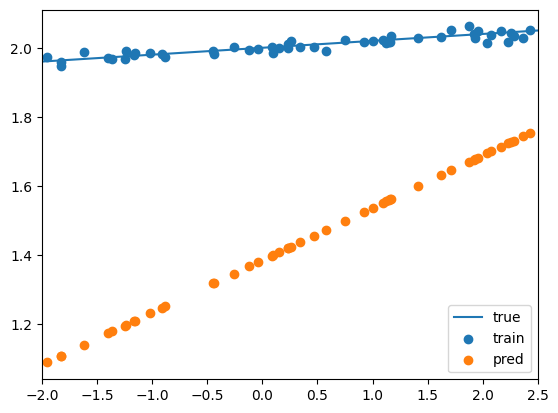

In [49]:
plt.plot(x, f(x), label='true')
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_train, pred, label='pred')
plt.xlim([-2, 2.5])
plt.legend();

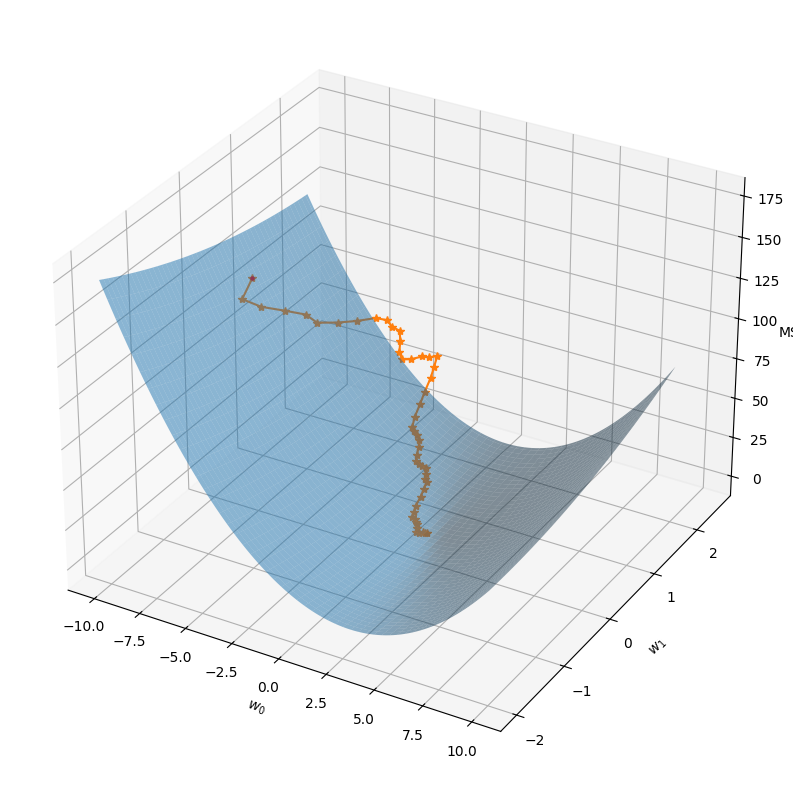

In [50]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w0, w1):
    y_pred = w1 * x_train + w0
    return np.mean((y_train - y_pred) ** 2)


coefs_a = np.linspace(-2, 2, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w0), np.ravel(w1))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w0, w1, Z, alpha=.5)
ax.scatter(weight_0, weight_1, mse(weight_0, weight_1), c='r', s=5)

mses = []
for i in range(len(adam_sgd_weights_0)):
    mses.append(mse(adam_sgd_weights_0[i], adam_sgd_weights_1[i]))
ax.plot(adam_sgd_weights_0, adam_sgd_weights_1, mses, marker='*')

ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('MSE')

plt.show()

In [51]:
from keras.optimizers import Adam
Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

<img src='https://i0.wp.com/blog-cdn.ineuron.ai/user/uploads/777323856e548c565763e4046d7fd064.png?w=750&ssl=1'>